In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0-reading the csv files and naming coulmns 

In [4]:
column_names = ['tweet_id', 'entity', 'sentiment', 'tweet_content']

df_train = pd.read_csv('twitter_training.csv', names=column_names)
df_val = pd.read_csv('twitter_validation.csv', names=column_names)

print("Training Data Info:")
df_train.info()
print("\nTraining Data Head:")
print(df_train.head())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB

Training Data Head:
   tweet_id       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       tweet_content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i wi

## 1-Missing values detection 

In [ ]:
print("Missing values before cleaning:")
print(df_train.isnull().sum())


df_train.dropna(subset=['tweet_content'], inplace=True)

n_duplicates = df_train.duplicated().sum()
print(f"\nNumber of duplicate rows found: {n_duplicates}")

df_train.drop_duplicates(inplace=True)

print(f"Total rows after cleaning (dropped missing and duplicates): {len(df_train)}")

Missing values before cleaning:
tweet_id           0
entity             0
sentiment          0
tweet_content    686
dtype: int64

Number of duplicate rows found: 2340
Total rows after cleaning (dropped missing and duplicates): 71656


## Sentiment Distribution

C:\Users\omarb\AppData\Local\Temp\ipykernel_21852\2004375914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='sentiment', data=df_train, order=df_train['sentiment'].value_counts().index, palette='viridis')


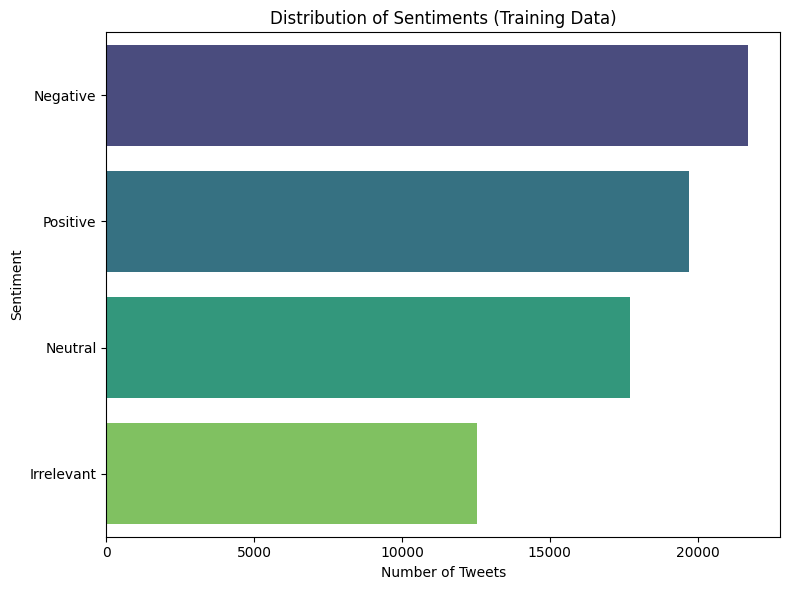

In [6]:
# 3.1. Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(y='sentiment', data=df_train, order=df_train['sentiment'].value_counts().index, palette='viridis')
plt.title('Distribution of Sentiments (Training Data)')
plt.xlabel('Number of Tweets')
plt.ylabel('Sentiment')
plt.tight_layout()
plt.savefig('sentiment_distribution.png')
plt.show()
plt.close()

## Entity Distribution
# Get value counts for entities and select the top 20

C:\Users\omarb\AppData\Local\Temp\ipykernel_21852\1723362599.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='entity', data=df_train, order=top_entities, palette='plasma')


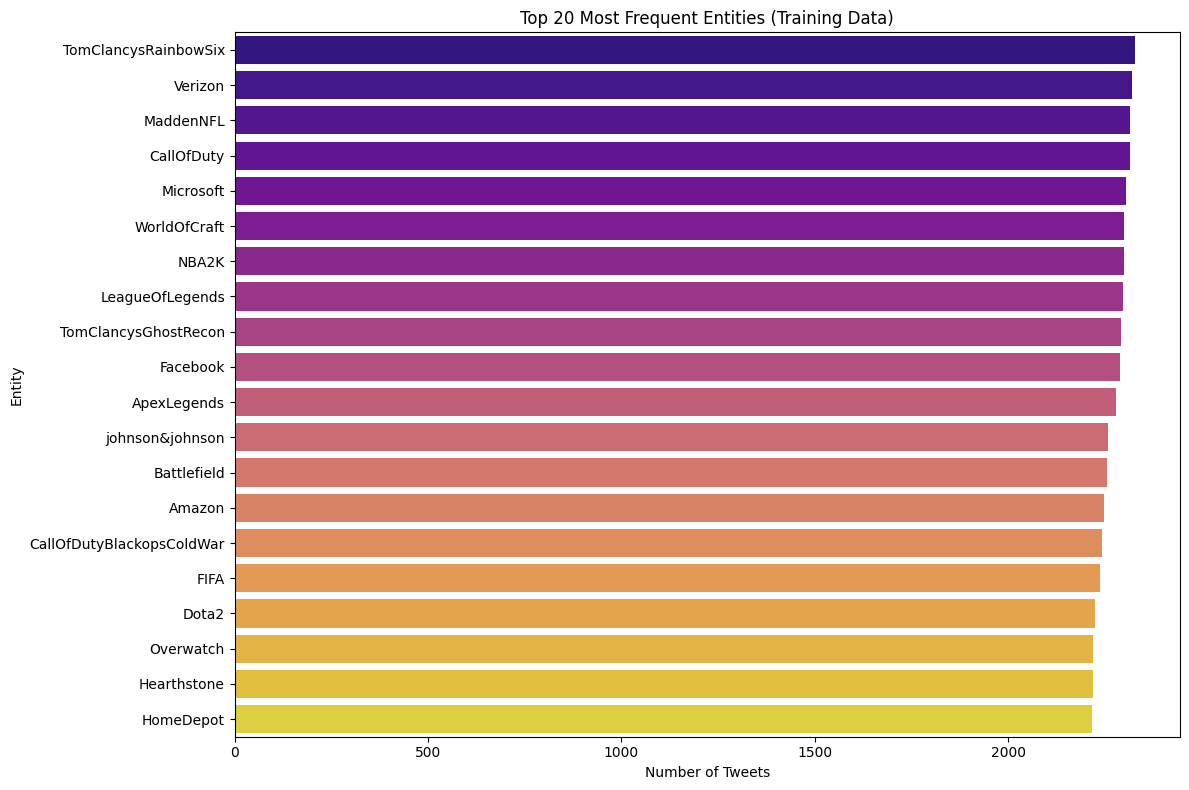

In [ ]:
plt.figure(figsize=(12, 8))

top_entities = df_train['entity'].value_counts().head(20).index
sns.countplot(y='entity', data=df_train, order=top_entities, palette='plasma')
plt.title('Top 20 Most Frequent Entities (Training Data)')
plt.xlabel('Number of Tweets')
plt.ylabel('Entity')
plt.tight_layout()
plt.savefig('entity_distribution.png')
plt.show()
plt.close()

## Bivariate Analysis: Sentiment by Entity
 1-Sentiment Distribution per Entity

 2-Create a cross-tabulation table
 
 3-Plot the stacked bar chart

<Figure size 1200x800 with 0 Axes>

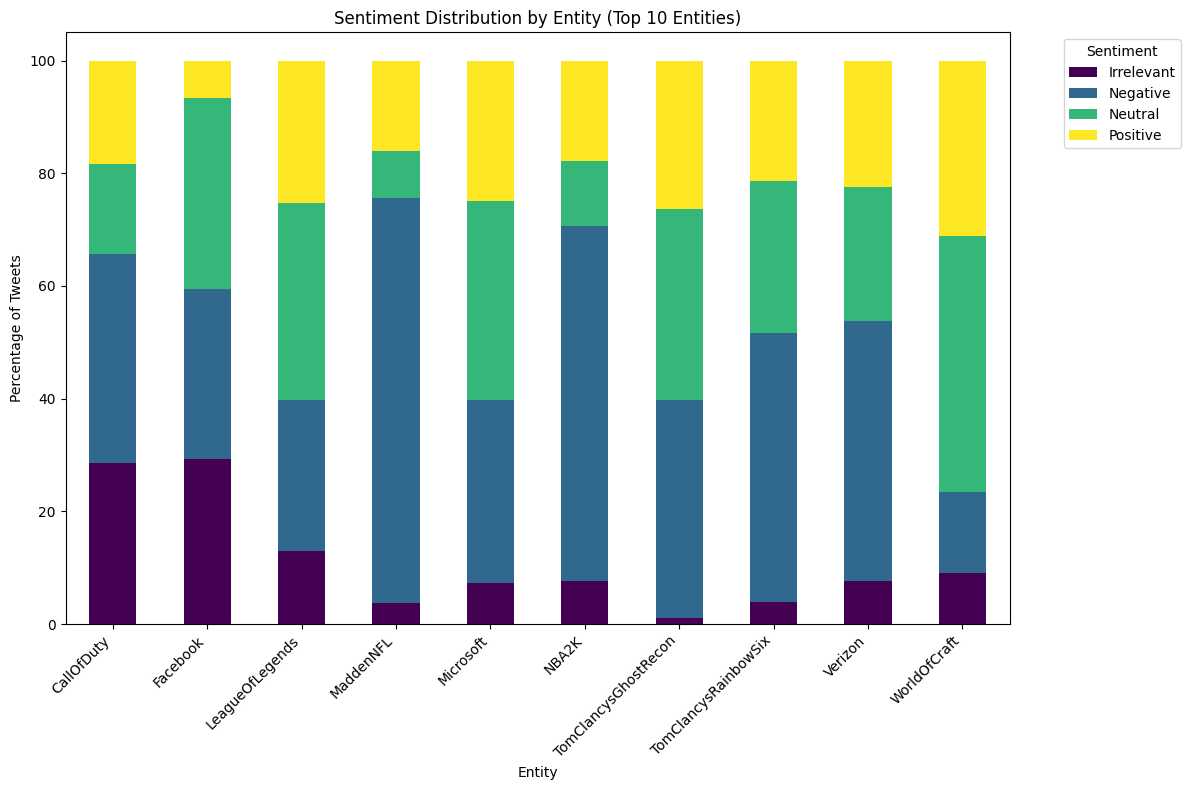

In [8]:

top_10_entities = df_train['entity'].value_counts().head(10).index
df_top_10 = df_train[df_train['entity'].isin(top_10_entities)]
sentiment_by_entity = pd.crosstab(df_top_10['entity'], df_top_10['sentiment'], normalize='index') * 100

plt.figure(figsize=(12, 8))
sentiment_by_entity.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Sentiment Distribution by Entity (Top 10 Entities)')
plt.xlabel('Entity')
plt.ylabel('Percentage of Tweets')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('sentiment_by_entity.png')
plt.show()
plt.close()

## Basic Text Analysis
1- Descriptive statistics for tweet length

2-Plot the distribution of tweet lengths



Tweet Length Descriptive Statistics:
count    71656.000000
mean       110.538127
std         79.409848
min          1.000000
25%         49.000000
50%         93.000000
75%        155.000000
max        957.000000
Name: tweet_length, dtype: float64


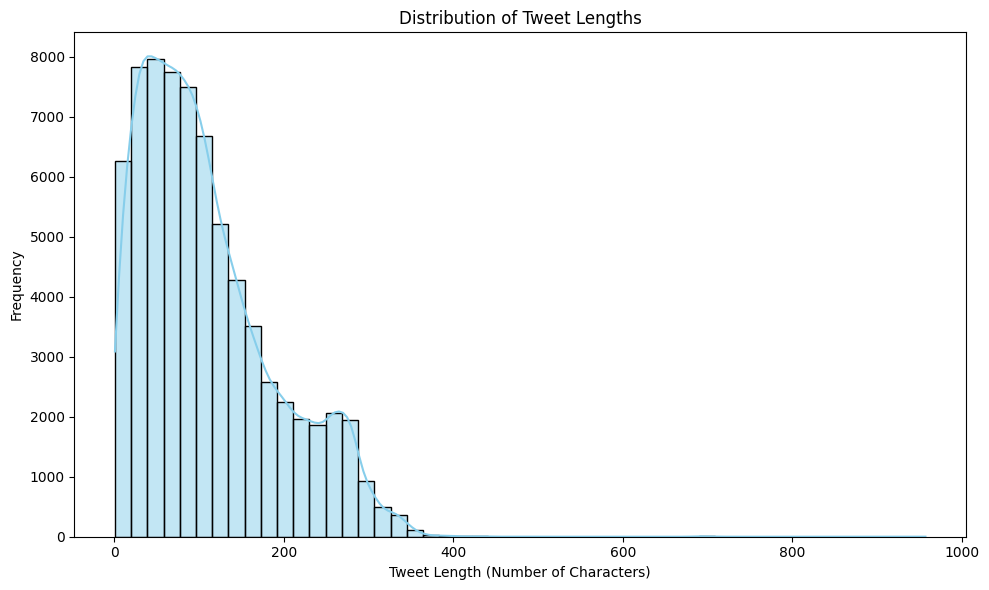

In [ ]:
df_train['tweet_length'] = df_train['tweet_content'].apply(len)

print("Tweet Length Descriptive Statistics:")
print(df_train['tweet_length'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(df_train['tweet_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (Number of Characters)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('tweet_length_distribution.png')
plt.show()
plt.close()
